In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
from astropy.table import Table
import fitsio

In [3]:
LSLGAdir = os.getenv('LSLGA_DIR')
galaxies = os.path.join(LSLGAdir, 'sample', 'large-galaxies-dr2.fits')

In [48]:
dat = Table.read(galaxies, format='fits')
columns = dat.colnames[:len(dat.colnames)-1]
dat = dat[columns]
df = dat.to_pandas()
df = df[df.BMAG > 0]
df.head()

,GALAXY,PGC,RA,DEC,TYPE,MULTIPLE,RADIUS,BA,PA,BMAG,IMAG,VHELIO
0,PGC000007,PGC0000007,0.01860,-0.08334,E-S0,,17.263199,0.812831,161.100006,15.740000,14.220000,7125.0
1,PGC000010,PGC0000010,0.03255,-0.04059,E-S0,,16.870239,0.794328,131.399994,15.810000,14.810000,7094.0
2,SDSSJ000011.99+010718.2,PGC3518734,0.04995,1.12172,,,16.486229,0.524807,8.700000,17.049999,16.559999,7283.0
4,PGC000020,PGC0000020,0.05325,1.12022,IAB,,26.128906,0.645654,132.500000,15.180000,14.060000,7395.0
5,PGC1093672,PGC1093672,0.07365,-2.38226,,,17.665310,0.758578,107.000000,15.780000,13.880000,7665.0


In [82]:
extent = (0, 24, -1.0, 3.0)

In [102]:
m31 = df[df.GALAXY.str.contains('NGC0224')]
smc = df[df.GALAXY.str.contains('NGC0292')]

Series([], Name: BMAG, dtype: float32)

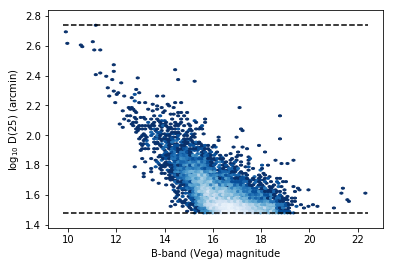

In [105]:
plt.figure()
plt.hexbin(df.BMAG, np.log10(2*df.RADIUS), bins='log', mincnt=1, cmap=plt.cm.Blues_r)
plt.ylim([np.log10(min(2*df.RADIUS))-0.1, np.log10(max(2*df.RADIUS))+0.1])
plt.xlabel('B-band (Vega) magnitude')
plt.ylabel(r'log$_{10}$ D(25) (arcmin)')
plt.hlines(np.log10(min(2*df.RADIUS)), min(df.BMAG)-0.1, max(df.BMAG)+0.1, colors='k', linestyles='dashed')
plt.hlines(np.log10(max(2*df.RADIUS)), min(df.BMAG)-0.1, max(df.BMAG)+0.1, colors='k', linestyles='dashed')
#plt.annotate('M31', xy=(m31.BMAG, np.log10(2*m31.RADIUS)), xytext=[m31.BMAG+3, np.log10(2*m31.RADIUS)+0.4], 
#                    arrowprops=dict(facecolor='gray', shrink=0.1, width=1, 
#                                    headwidth=6), fontsize=12, horizontalalignment='center',
#                                    verticalalignment='top')
#plt.annotate('SMC', xy=(smc.BMAG, np.log10(2*smc.RADIUS)), xytext=[smc.BMAG-1.5, np.log10(2*smc.RADIUS)-0.8], 
#                    arrowprops=dict(facecolor='gray', shrink=0.1, width=1, 
#                                    headwidth=6), fontsize=12, horizontalalignment='center',
#                                    verticalalignment='top')

(-90, 90)

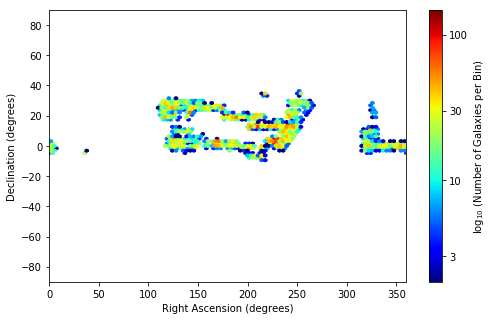

In [121]:
fig, ax = plt.subplots(figsize=(8, 5))
im = ax.hexbin(df.RA, df.DEC, bins='log', mincnt=1, extent=(0, 360, -90, 90), cmap=plt.cm.jet)
cb = fig.colorbar(im, ticks=[np.log10([3, 10, 30, 100, 300, 1000])])
cb.ax.set_yticklabels(['3', '10', '30', '100', '300', '1000'])
cb.set_label('log$_{10}$ (Number of Galaxies per Bin)')
ax.set_xlabel('Right Ascension (degrees)')
ax.set_ylabel('Declination (degrees)')
ax.set_xlim((0, 360))
ax.set_ylim((-90, 90))